## Matplotlib Assignment

###  Question 1

We have the min and max temperatures in a city In India for each months of the year.We would like to find a function to describe this and show it graphically, the dataset given below.


Task:

1.fitting it to the periodic function

2.plot the fit


Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

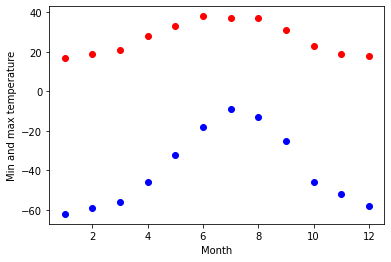

In [2]:
temp_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18 ])
temp_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(1,13)
plt.plot(figsize =(20,20),)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.show()

In [3]:
# 1.fitting  to the periodic function
from scipy import optimize
def temp_yearly(times, avg, ampl, time_offset):
    return (avg+ ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

opt_residuals_max, max_cov = optimize.curve_fit(temp_yearly, months,temp_max)
opt_residuals_min, min_cov = optimize.curve_fit(temp_yearly, months,temp_min)

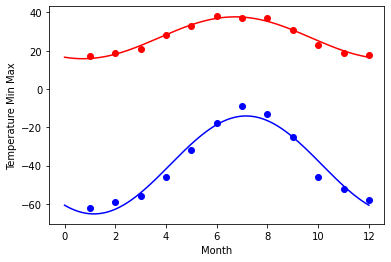

In [4]:
# 2.plot the fit
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, temp_yearly(days, *opt_residuals_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, temp_yearly(days, *opt_residuals_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature Min Max')

plt.show()

-------------------------------------------------------------------------------------------------------------------------

### Question 2
Charts to plot:
    1. Create a pie chart presenting the male/female proportion
    2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [5]:
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [6]:
sex_prop=titanic.sex.value_counts()
sex_prop

male      843
female    466
Name: sex, dtype: int64

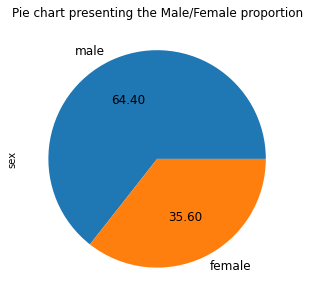

In [7]:
sex_prop.plot(kind="pie",figsize=(5,5),title = 'Pie chart presenting the Male/Female proportion',autopct = '%.2f',fontsize = 12 )
plt.show()

<Figure size 432x288 with 0 Axes>

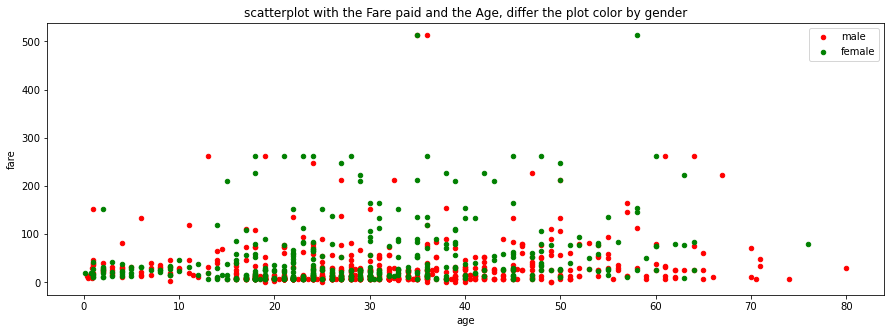

In [8]:
plt.figure()
cat1=titanic[titanic['sex']=='male'].plot.scatter('age','fare',c ='red',label ='male',figsize=(15,5),title = 'scatterplot with the Fare paid and the Age, differ the plot color by gender')
titanic[titanic['sex']=='female'].plot.scatter('age','fare',c ='green',label ='female',ax=cat1)